<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is03_3layerNNbyscikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3layer NN by scikitlearn

Training Accuracy: 98.12%
Testing Accuracy: 100.00%


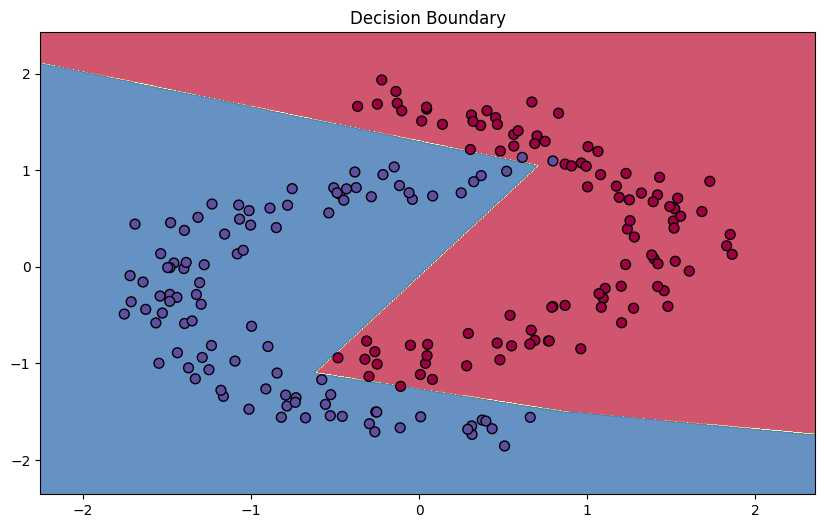

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create two "C" shaped datasets
def generate_c_shape_data():
    np.random.seed(0)
    N = 100  # Number of points per class
    t = np.linspace(0, np.pi, N)

    # Class 1
    X1 = np.array([np.sin(t), np.cos(t)]).T + np.random.randn(N, 2) * 0.1
    # Class 2 (Shifted C)
    X2 = np.array([-np.sin(t), -np.cos(t)]).T + np.array([0.5, -0.5]) + np.random.randn(N, 2) * 0.1

    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(N), np.ones(N))).reshape(-1, 1)

    return X, y

# Generate the dataset
X, y = generate_c_shape_data()
y = y.ravel()  # Flatten y for scikit-learn

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network using MLPClassifier with more hidden units and a higher alpha for regularization
mlp = MLPClassifier(hidden_layer_sizes=(4, 3), activation='relu', solver='adam', max_iter=10000, alpha=0.001, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Evaluate the model
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)
print(f"Training Accuracy: {train_score * 100:.2f}%")
print(f"Testing Accuracy: {test_score * 100:.2f}%")

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, mlp)
